In [27]:
# importing every necessary function and library
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  ## maybe use something different that accuracy later on
from sklearn.model_selection import ShuffleSplit

import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("../task_data.csv")


In [4]:
data = data.replace(',', '.', regex=True)

In [26]:
data.isnull().values.any()

np.False_

In [21]:
data.head(37)
X = data.drop(columns=['ID', 'Cardiomegaly']) ## dropping ID, because there is no use for it (especially in a decision tree)
y = data['Cardiomegaly']                      ## however Cardiomegaly has a use in determining the result
## print(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) ## random state, so best_params_ stay the same throughout the whole process

print("data shape:", data.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X cols:", list(X.columns))

data shape: (37, 14)
X shape: (37, 12)
y shape: (37,)
X cols: ['Heart width', 'Lung width', 'CTR - Cardiothoracic Ratio', 'xx', 'yy', 'xy', 'normalized_diff', 'Inscribed circle radius', 'Polygon Area Ratio', 'Heart perimeter', 'Heart area ', 'Lung area']


In [6]:
X.head(20) ## just checkin

,Heart width,Lung width,CTR - Cardiothoracic Ratio,xx,yy,xy,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
0,172,405,0.424691358,1682.360871,3153.671880,-638.531109,-0.304239,68.8186,0.213446,679.4873689,24898,75419
1,159,391,0.4066496164,1526.660960,5102.159054,-889.678405,-0.539387,73.92564,0.203652,788.6589419,29851,94494
2,208,400,0.52,2465.903392,5376.834707,-1755.344699,-0.371163,69.33974,0.320787,862.3229369,33653,66666
3,226,435,0.5195402299,2509.063593,6129.821270,-1025.079806,-0.419123,84.14868,0.317545,906.724959,42018,82596
4,211,420,0.5023809524,2368.770135,5441.767075,-1493.040062,-0.393442,73.78347,0.263542,864.2396777,35346,85631
5,222,405,0.5481481481,2351.057355,8378.677729,-812.061371,-0.561768,83.86298,0.328101,1001.068103,46381,92755
6,202,498,0.40562249,2251.879460,4467.406612,-511.955541,-0.329727,84.72308,0.209396,808.2985504,35417,116542
7,228,474,0.4810126582,2971.936804,3971.943088,-885.822012,-0.144013,83.73769,0.242418,821.9554045,36716,97325
8,176,449,0.3919821826,1833.841218,3709.724540,-831.472858,-0.338389,73.40981,0.181388,727.9726499,27939,99656
9,223,473,0.4714587738,2412.707474,6169.769803,-880.450924,-0.437760,76.41989,0.261665,922.9259679,38162,105442


In [ ]:
params = {'max_depth': [None, 2, 3, 4, 5], 'max_leaf_nodes': [None, 2, 4, 8, 16, 32]} 
clf = GridSearchCV(DecisionTreeClassifier(), params) 


In [ ]:

clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': None, 'max_leaf_nodes': None}

In [76]:
accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.75


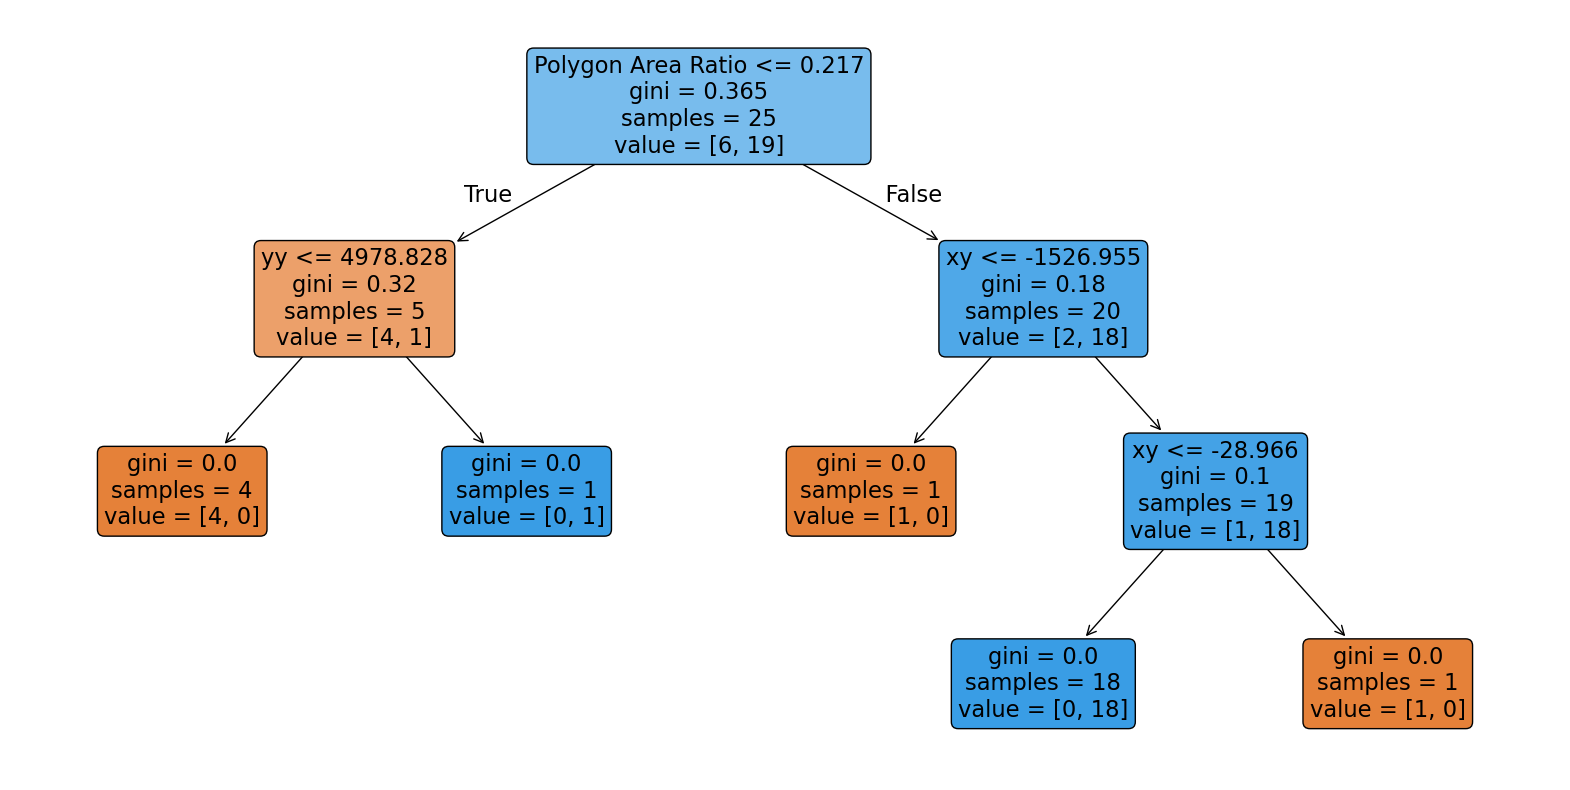

In [25]:
best_tree = clf.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()